In [1]:
# Importing necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.layers import Conv2DTranspose, Reshape

In [2]:
# Input directory
input_dir = r'C:\Users\edulo\OneDrive\Documentos\Loyalist\Term 3\Deep Learning\Week 10\facedetectionDS\facedetectionDS\faces'

### Preprocessing

In [3]:
# List of original images
image_files = os.listdir(input_dir)

# List of preprocessed images
preprocessed_images = []

In [4]:
# Iterate through each image file
for image_file in image_files:
    
    # Read image
    image_path = os.path.join(input_dir, image_file)
    image = cv2.imread(image_path)

    # Converting to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize image
    resized_image = cv2.resize(gray_image, (128, 128))
    
    # Normalize and scale image
    scaled_image = resized_image / 255.0

    # Add preprocessed image to list
    preprocessed_images.append(scaled_image)

In [5]:
# Converting list to NumPy array
preprocessed_data = np.array(preprocessed_images)

In [6]:
# Printing the shape of preprocessed data
print("Shape of preprocessed data:", preprocessed_data.shape)

Shape of preprocessed data: (1314, 128, 128)


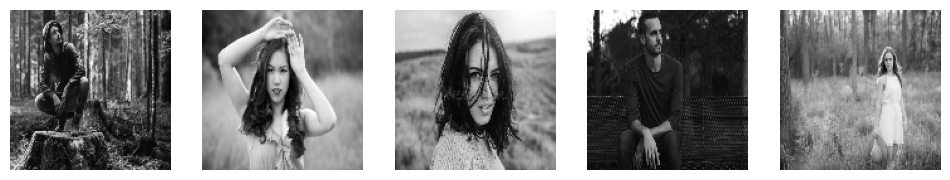

In [7]:
# Printing 5 preprocessed images
num_images_to_print = min(5, len(preprocessed_data))
plt.figure(figsize=(12, 3))
for i in range(num_images_to_print):
    plt.subplot(1, num_images_to_print, i + 1)
    plt.imshow(preprocessed_data[i], cmap='gray')
    plt.axis('off')
plt.show()

In [8]:
# Spliting data into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_val = train_test_split(preprocessed_data, test_size=0.2, random_state=42)

### Autoencoder

In [9]:
# Define stacked autoencoder model
model = Sequential()

In [10]:
# Input layer
model.add(Input(shape=(128, 128)))

In [11]:
# Encoder layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

In [12]:
# Decoder layers
model.add(Dense(64, activation='relu'))
model.add(Dense(128*128, activation='sigmoid'))
model.add(Reshape((128, 128)))

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

In [14]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,048,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16384)          │     1,064,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 128, 128)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,117,792 (8.08 MB)

 Trainable params: 2,117,792 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train the model
history = model.fit(x_train, x_train, epochs=10, batch_size=32, validation_data=(x_val, x_val))

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6717 - val_loss: 0.6453
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6383 - val_loss: 0.6204
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6100 - val_loss: 0.6026
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5963 - val_loss: 0.5982
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5925 - val_loss: 0.5919
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5784 - val_loss: 0.5926
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5743 - val_loss: 0.5892
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5746 - val_loss: 0.5938
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5781 - val_loss: 0.5853
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5699 - val_loss: 0.5825


In [16]:
# Evaluate the model
loss = model.evaluate(x_val, x_val)
print("Validation Loss:", loss)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5895 
Validation Loss: 0.5825142860412598


In [17]:
# Visualize reconstruction
reconstructed_images = model.predict(x_val)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


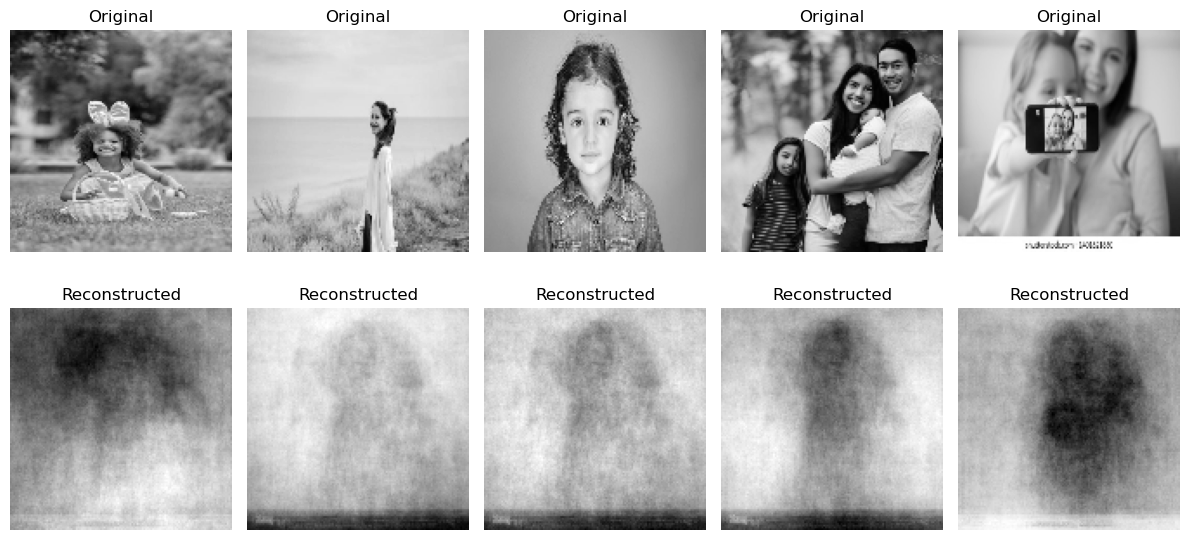

In [18]:
plt.figure(figsize=(12, 6))
for i in range(5):
    # Original image
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_val[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed image
    plt.subplot(2, 5, i + 6)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()

### Stacked Autoencoder

### Model 2

In [19]:
# Defining autoencoder model with CNN architecture
model2 = Sequential()

In [20]:
# Encoder
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 1)))
model2.add(MaxPooling2D((2, 2), padding='same'))
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D((2, 2), padding='same'))

C:\Users\edulo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [21]:
# Decoder
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(UpSampling2D((2, 2)))
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model2.add(UpSampling2D((2, 2)))
model2.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

In [22]:
# Compiling model
model2.compile(optimizer='adam', loss='binary_crossentropy')

In [23]:
# Printing model summary
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 1)    │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Training model
history2 = model2.fit(x_train, x_train, epochs=10, batch_size=32, validation_data=(x_val, x_val))

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.6319 - val_loss: 0.5133
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 0.5074 - val_loss: 0.4921
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - loss: 0.4878 - val_loss: 0.4847
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - loss: 0.4856 - val_loss: 0.4805
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 0.4743 - val_loss: 0.4827
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - loss: 0.4831 - val_loss: 0.4803
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - loss: 0.4872 - val_loss: 0.4767
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - loss: 0.4798 - val_loss: 0.4797
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - loss: 0.4735 - val_loss: 0.4754
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - loss: 0.4764 - val_loss: 0.4750


In [25]:
# Evaluating model
loss = model2.evaluate(x_val, x_val)
print("Validation Loss:", loss)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.4888
Validation Loss: 0.47504493594169617


In [26]:
# Visualize reconstruction
reconstructed_images2 = model2.predict(x_val)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


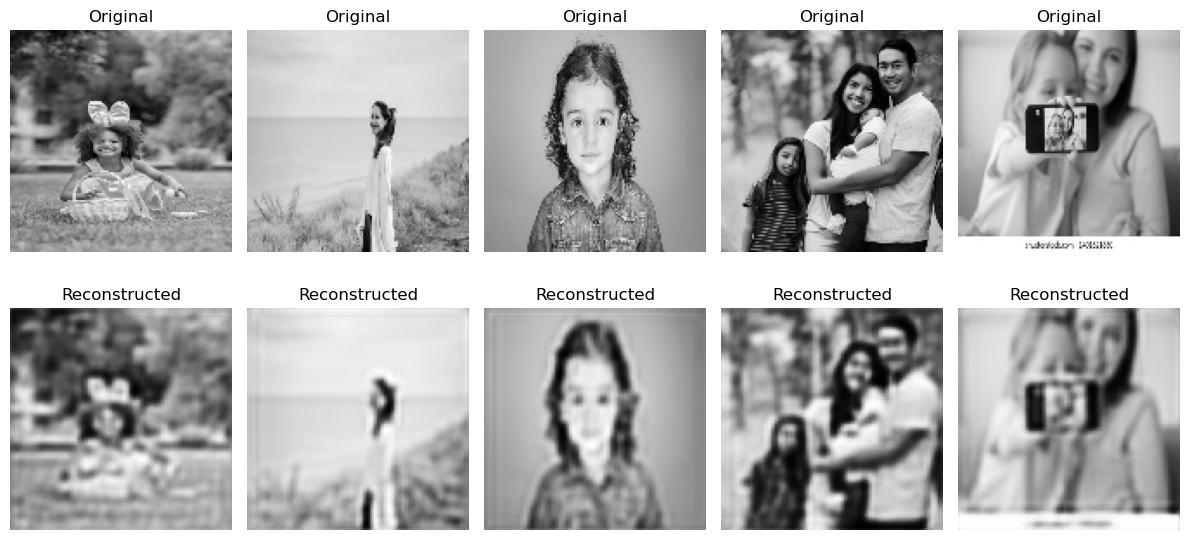

In [27]:
plt.figure(figsize=(12, 6))
for i in range(5):
    # Original image
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_val[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed image
    plt.subplot(2, 5, i + 6)
    plt.imshow(reconstructed_images2[i], cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()